<a href="https://colab.research.google.com/github/contreras-juan/UPTC_Diplomado_Ciencia_de_Datos/blob/main/metodos_supervisados/series_tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://storage.googleapis.com/adonaivera_certified/banner.png">
    
##  Diplomado en Ciencia de Datos - Cohorte 2024

Autor: [Juan Felipe Contreras](https://www.linkedin.com/in/juanf-contreras/)

<h1 align = 'center'> Series de tiempo </h1>

Las series de tiempo son conjuntos de datos que representan observaciones realizadas a lo largo del tiempo, donde cada observación está asociada con un punto específico en el tiempo. Estas series son utilizadas en diversos campos como la economía, las finanzas, la meteorología, la ingeniería y la medicina, entre otros, para analizar y modelar el comportamiento de variables a lo largo del tiempo, identificar tendencias, patrones estacionales, y realizar pronósticos futuros. La naturaleza secuencial de los datos en las series de tiempo las distingue de otros tipos de datos, lo que requiere técnicas y herramientas específicas para su análisis y comprensión.

Para ejecutar las siguientes línease de código es importante instalar ```yfinance``` ejecutando la línea de código ```!pip install yfinance```

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = yf.download('MSFT', start='2017-01-01')
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,62.790001,62.840000,62.130001,62.580002,56.930565,20694100
2017-01-04,62.480000,62.750000,62.119999,62.299999,56.675861,21340000
2017-01-05,62.189999,62.660000,62.029999,62.299999,56.675861,24876000
2017-01-06,62.299999,63.150002,62.040001,62.840000,57.167110,19922900
2017-01-09,62.759998,63.080002,62.540001,62.639999,56.985149,20382700
...,...,...,...,...,...,...
2024-05-13,418.010010,418.350006,410.820007,413.720001,412.975098,15440200
2024-05-14,412.019989,417.489990,411.549988,416.559998,415.809998,15109300
2024-05-15,417.899994,423.809998,417.269989,423.079987,423.079987,22239500


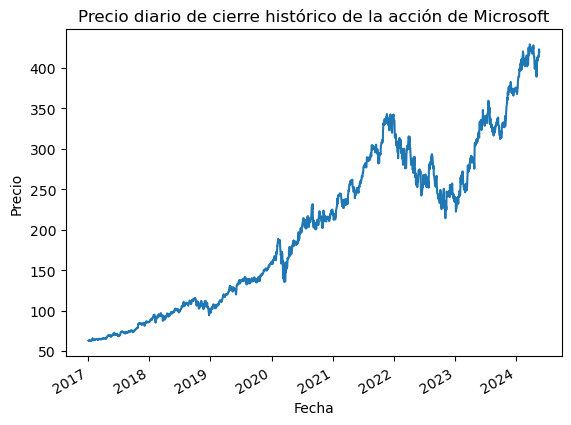

In [4]:
data['Close'].plot()
plt.ylabel('Precio')
plt.xlabel('Fecha')
plt.title('Precio diario de cierre histórico de la acción de Microsoft');

<h2> Componentes de una serie de tiempo </h2>

Las series de tiempo son datos secuenciales que pueden descomponerse en componentes distintivos, siendo cuatro de los más importantes la tendencia (Tt), la estacionalidad (St), la ciclicidad (Ct) y el ruido (εt). Sea $\{ y_{t} \}_{t=0}^{\infty}$ una serie temporal, podemos definir los componentes de la siguiente manera:

**Tendencia (Tt)**: La tendencia en una serie de tiempo describe la dirección general en la que los datos evolucionan a lo largo del tiempo. Puede ser creciente, decreciente o estable. La tendencia se puede modelar de diversas formas, pero una de las más simples es mediante una función lineal. Se puede expresar como:

$$y_{t} = \beta_{0} + \beta_{1}t + \varepsilon_t $$

Donde $\beta_0$ y $\beta_1$ son los parámetros de la línea de tendencia y $\varepsilon_t$ es el término de error aleatorio en el tiempo t.


Text(0, 0.5, 'Valor')

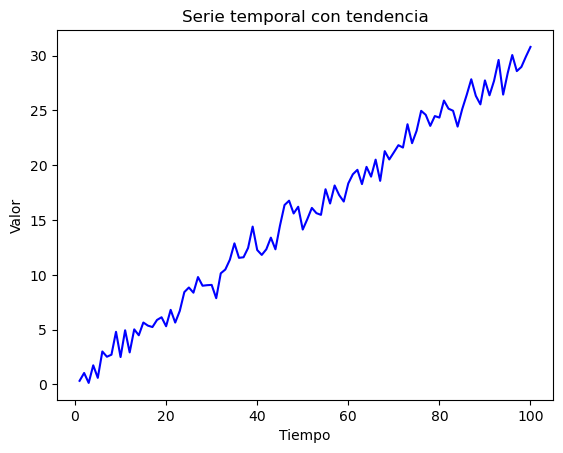

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
T = 100  # Longitud de la serie de tiempo
t = np.arange(1, T+1)  # Tiempo

# Simulación de los componentes
# Tendencia
beta_0 = 0.5
beta_1 = 0.3
e = np.random.normal(scale = 1, size=100)
tendencia = beta_0 + beta_1 * t + e
plt.plot(t, tendencia, color='blue')
plt.title('Serie temporal con tendencia')
plt.xlabel('Tiempo')
plt.ylabel('Valor')

**Estacionalidad (St)**: La estacionalidad representa patrones recurrentes o cíclicos en los datos que se repiten en intervalos fijos de tiempo, como estaciones del año, meses, semanas o días. Se puede modelar utilizando funciones sinusoidales o con un enfoque de medias móviles. La estacionalidad se puede expresar como:

$$y_{t} = y_{t-m} + \varepsilon_{t}$$

Donde $m > 0$ representa una cantidad de periodos del pasado.

Text(0, 0.5, 'Valor')

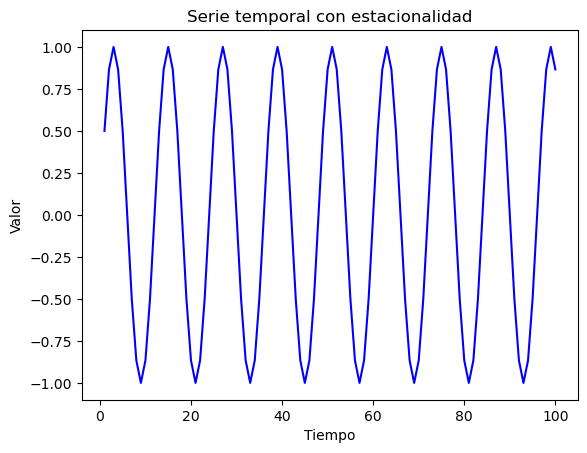

In [6]:
# Estacionalidad
periodo_estacionalidad = 12  # Estacionalidad mensual
estacionalidad = np.sin(2 * np.pi * t / periodo_estacionalidad)

plt.plot(t, estacionalidad, color='blue')
plt.title('Serie temporal con estacionalidad')
plt.xlabel('Tiempo')
plt.ylabel('Valor')

**Ciclicidad (Ct)**: La ciclicidad es similar a la estacionalidad, pero no sigue un patrón regular y predecible como la estacionalidad. En cambio, la ciclicidad representa fluctuaciones que no son periódicas pero que aún se repiten a lo largo del tiempo. Se puede modelar utilizando funciones polinómicas de grado superior o mediante técnicas de suavizado. La ciclicidad se puede expresar como:

$$y_{t} = f(t) + \varepsilon_t$$

Donde $f(t)$ es una función que describe el comportamiento cíclico $\varepsilon_t$ es el término de error aleatorio en el tiempo $t$.

Text(0, 0.5, 'Valor')

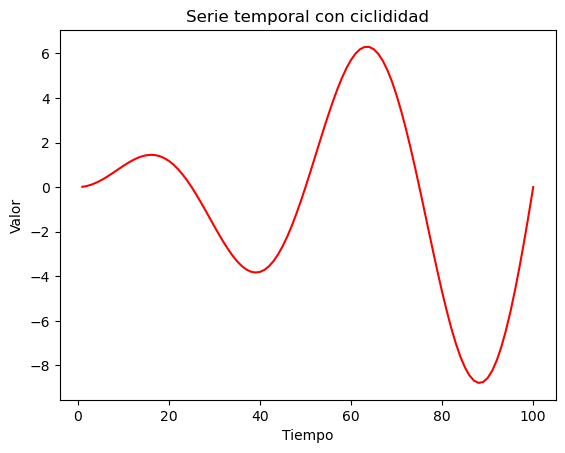

In [7]:
# Ciclicidad
ciclicidad = 0.1 * t * np.sin(2 * np.pi * t / 50)

plt.plot(t, ciclicidad, color='red')
plt.title('Serie temporal con ciclididad')
plt.xlabel('Tiempo')
plt.ylabel('Valor')

**Ruido (εt)**: El ruido, también conocido como error aleatorio, es la variación no sistemática o irregular que no se puede atribuir a la tendencia, la estacionalidad o la ciclicidad. Es esencialmente el residuo de la serie de tiempo después de que se han tenido en cuenta los otros componentes. El ruido se considera una componente estocástica y se asume que sigue una distribución aleatoria con media cero y varianza constante.

$$\varepsilon_t \sim N(0, \sigma^2) $$

Donde $N(0, \sigma^2)$ representa una distribución normal con media cero y varianza $σ^2$.

Text(0, 0.5, 'Valor')

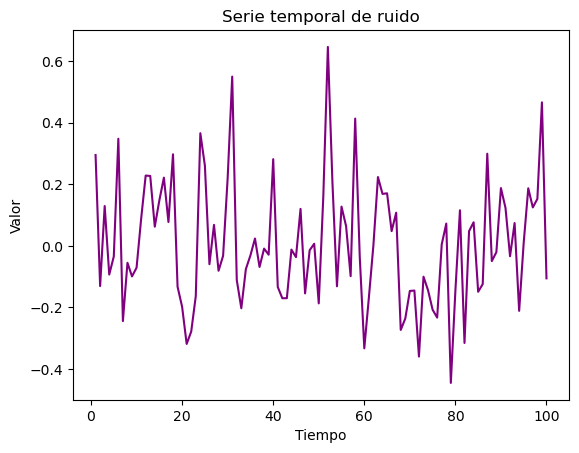

In [8]:
# ruido
media_ruido = 0
desviacion_ruido = 0.2
ruido = np.random.normal(media_ruido, desviacion_ruido, T)

plt.plot(t, ruido, color='purple')
plt.title('Serie temporal de ruido')
plt.xlabel('Tiempo')
plt.ylabel('Valor')

Con base en todos los componentes anteriores, podemos definir una serie de tiempo como

$$y_{t} = t + S(t) + C(t) + \varepsilon_{t}$$

Text(0, 0.5, 'Valor')

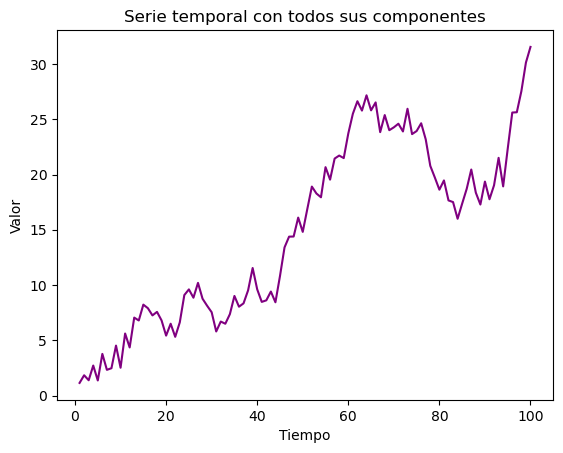

In [9]:
y = tendencia + estacionalidad + ciclicidad + ruido
plt.plot(t, y, color='purple')
plt.title('Serie temporal con todos sus componentes')
plt.xlabel('Tiempo')
plt.ylabel('Valor')

<h2> Series de tiempo estacionarias </h2>

Una serie estacionaria es un concepto fundamental en el análisis de series de tiempo que describe un tipo particular de comportamiento donde las propiedades estadísticas de la serie no cambian significativamente con el tiempo. En otras palabras, una serie estacionaria exhibe un comportamiento constante en términos de su media, varianza y autocorrelación a lo largo del tiempo.

Para una serie de tiempo $y_t$, se considera estacionaria si cumple con las siguientes condiciones:

**Media constante**: La media de la serie $\mu$ es constante para todos los instantes de tiempo $t$, esto es

$$E(y_t) = \mu, \quad t=0,1,2,3,...$$

**Varianza constante**: La varianza de la serie $\sigma^2$ es constante para todos los instantes de tiempo $t$

$$Var(y_t) = \sigma^2, \quad t = 0,1,2,3,... $$

**Autocorrelación constante**: La autocorrelación entre $ y_t $ y $y_{t+k} $ es constante para todos los $k$, donde $k$ es el desplazamiento temporal. Esto es

$$Corr(y_t, y_{t+k}) = \gamma(k), \quad t = 0,1,2,3,...  $$

La estacionariedad es importante porque simplifica el análisis de la serie de tiempo y facilita la identificación de patrones, tendencias y comportamientos repetitivos. Además, muchas técnicas de modelado y predicción de series de tiempo asumen la estacionariedad de los datos.

Si una serie de tiempo no es estacionaria, es posible que se requiera aplicar técnicas de transformación, como la diferenciación o la descomposición, para hacerla estacionaria antes de realizar un análisis o modelado más profundo.

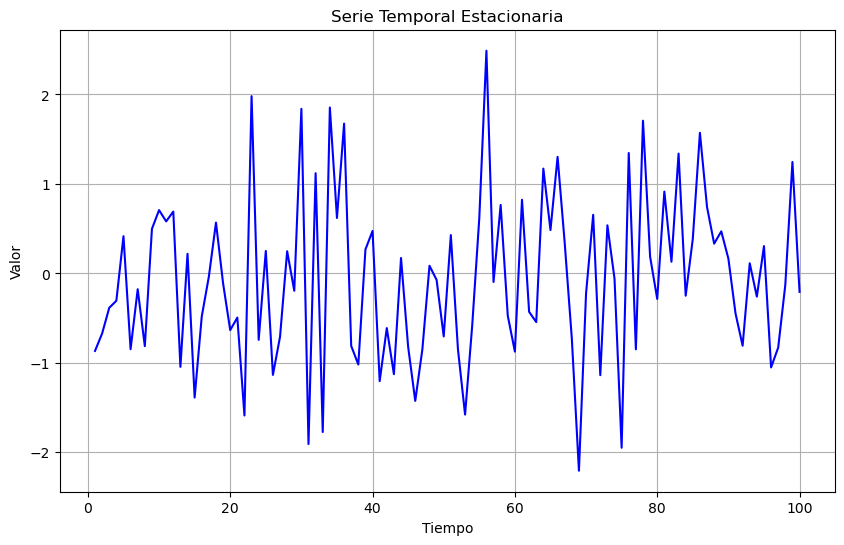

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
T = 100  # Longitud de la serie de tiempo
t = np.arange(1, T+1)  # Tiempo

# Generación de la serie estacionaria
media = 0  # Media constante
desviacion = 1  # Varianza constante
serie_estacionaria = np.random.normal(media, desviacion, T)

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(t, serie_estacionaria, color='blue')
plt.title('Serie Temporal Estacionaria')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.grid(True)
plt.show()

<h3> ¿Cómo convertimos una serie de tiempo no estacionaria en estacionaria?</h3>

Con el objetivo de ser capaces de analizar series de tiempo no estacionaria debemos convertir la serie en estacionaria, ya que esto genera buenas propiedades que permiten la explicabilidad y predictibilidad de la misma. La forma más común es diferenciar la serie temporal, definimos la diferencia de orden 1 de una serie como:

$$\Delta_{1} y  = y_{t} - y_{t -1}$$

y la diferencia de orden $k$ como

$$\Delta_{k} y = \Delta_{k} y- \Delta_{k - 1} y$$

Aunque, por lo general no es recomendable diferenciar una serie temporal excesivamente, en la mayoría de casos más de dos o tres veces se puede considerar excesivo.

Para entender por qué esto funciona, supongamos una serie temporal con tendencia y estacionalidad:

$$y_{t} = T_{t} + S_{t} + \epsilon_{t}$$

Si diferenciamos:

$$\Delta_{1} y = \left(T_t - T_{t - 1} \right) - \left( S_t - S_{t - 1} \right) + \left( \epsilon_{t} - \epsilon_{t - 1} \right)$$

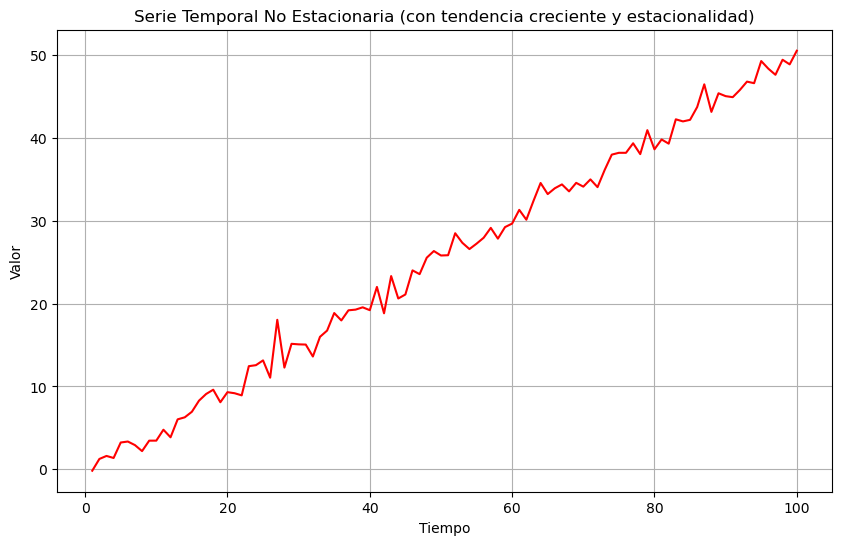

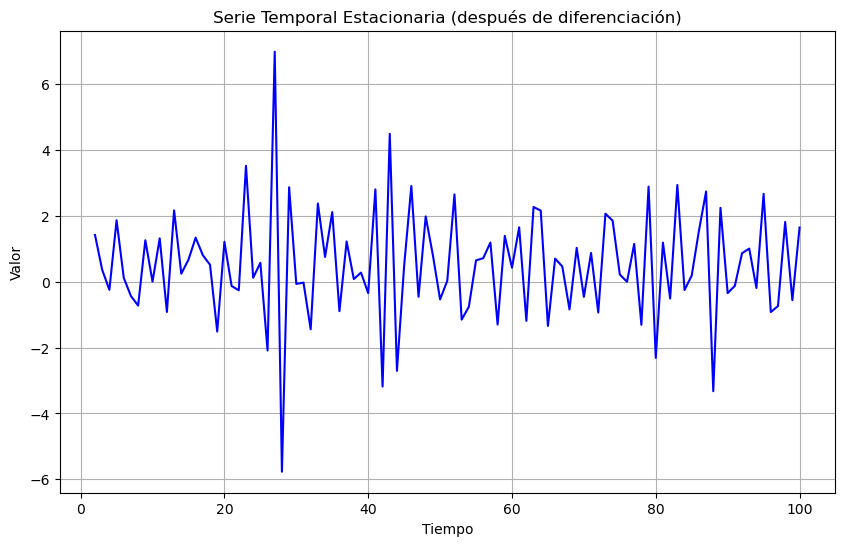

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
T = 100  # Longitud de la serie de tiempo
t = np.arange(1, T+1)  # Tiempo

# Generación de la serie no estacionaria con tendencia creciente y estacionalidad
tendencia = 0.5 * t  # Tendencia creciente
estacionalidad = 0.5 * np.sin(2 * np.pi * t / 12)  # Estacionalidad mensual
ruido = np.random.normal(0, 1, T)  # Componente de ruido aleatorio
serie_no_estacionaria = tendencia + estacionalidad + ruido

# Gráfico de la serie no estacionaria
plt.figure(figsize=(10, 6))
plt.plot(t, serie_no_estacionaria, color='red')
plt.title('Serie Temporal No Estacionaria (con tendencia creciente y estacionalidad)')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.grid(True)
plt.show()

# Diferenciación para hacer la serie estacionaria
serie_estacionaria = np.diff(serie_no_estacionaria)

# Gráfico de la serie estacionaria
plt.figure(figsize=(10, 6))
plt.plot(t[1:], serie_estacionaria, color='blue')
plt.title('Serie Temporal Estacionaria (después de diferenciación)')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.grid(True)
plt.show()

<h2> Modelos de series de tiempo </h2> 

<h3> Modelos autoregresivos (AR) </h3>

Los modelos autorregresivos (AR) son un tipo fundamental de modelo utilizado en el análisis de series de tiempo para predecir valores futuros en función de valores pasados de la misma serie. Estos modelos se basan en la idea de que los valores pasados de la serie contienen información útil para predecir los valores futuros. Un modelo autorregresivo de orden $p$, denotado como $AR(p)$, predice el valor en el tiempo $t$ como una combinación lineal de los $p$ valores anteriores, más un término de error. Matemáticamente, un modelo $AR(p)$ se define de la siguiente manera:

$$y_t = \beta_{0} + \sum_{i = 1}^{p} \beta_{i} y_{t - i} + \varepsilon_t $$

Donde:
- $y_t$: es el valor de la serie en el tiempo $t$.
- $\beta_i$: es el parámetro del modelo que representan la relación entre los valores pasados y el valor actual de la serie.
- $\varepsilon_t$: es un término de error aleatorio en el tiempo $t$, que se asume que sigue una distribución normal con media cero y varianza constante.

Por ejemplo, si $p = 1$:

$$y_{t} = \beta_{0} + \beta_{1} y_{t - 1} + \varepsilon$$

Puede demostrarse que esta serie será estacionaria si, y solo si, $\vert \beta_{1} \vert < 1$, y

$$E\left[y_{t} \right] = \frac{\beta_{0}}{1 - \beta_{1}}, \quad V\left[y_{t} \right] = \frac{\sigma^{2}}{ 1 - \beta_{1}^{2}}$$

Para el caso general, tenemos

$$E \left[y_{t} \right] = \frac{\beta_{0}}{1 - \sum_{i = 1}^{p} \beta_{i}}, \quad V\left[y_{t} \right] = \frac{\sigma^{2}}{1 - \sum_{i = 1}^{p} \beta_{i}^{2}}$$

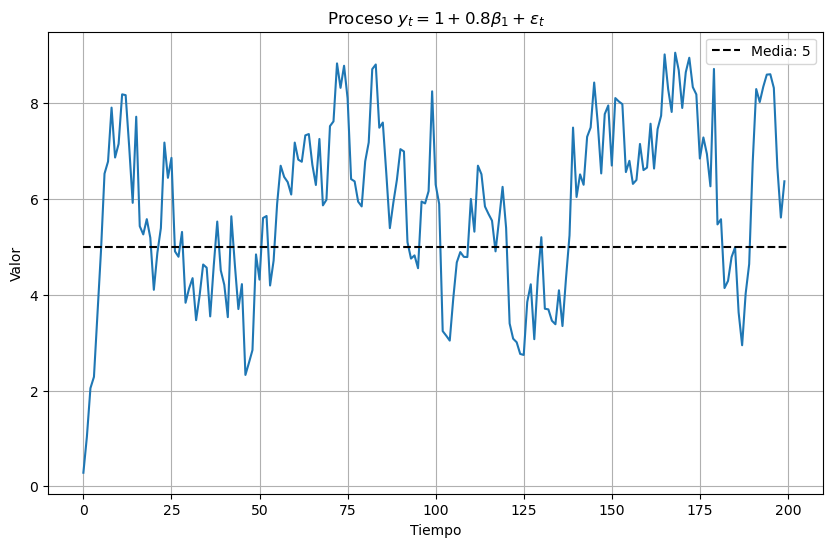

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del proceso AR(1)
phi = 0.8  # Coeficiente de autoregresión
sigma = 1  # Varianza del término de error
T = 200  # Longitud de la serie temporal

media = 1/(1 - phi)
# Generación de la serie temporal AR(1)
X = np.zeros(T)
X[0] = np.random.normal(0, sigma)  # Valor inicial de la serie

for t in range(1, T):
    X[t] = 1 + phi * X[t-1] + np.random.normal(0, sigma)

# Gráfico de la serie temporal
plt.figure(figsize=(10, 6))
plt.plot(X)
plt.hlines(media, xmin=0, xmax=T, linestyles='dashed', label='Media: 5', color='black')
plt.title(r'Proceso $y_{t} = 1 + 0.8 \beta_{1} + \varepsilon_{t}$')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.grid(True)
plt.legend()
plt.show()

<h3> Modelos de media móvil (MA) </h3>

Un proceso de media móvil es un tipo de modelo utilizado en el análisis de series temporales para describir cómo el valor de una variable cambia en función de un promedio ponderado de los errores aleatorios pasados. En un proceso de media móvil, el valor en un momento dado $t$ es una combinación lineal de los términos de error en momentos anteriores, cada uno ponderado por un coeficiente. El orden de un proceso de media móvil, denotado como $MA(q)$, indica cuántos términos de error pasados se incluyen en el modelo. Por ejemplo, en un proceso $MA(1)$, el valor en el tiempo $t$ depende solo del error en el tiempo $t-1$, mientras que en un proceso $MA(2)$, depende de los errores en los tiempos $t-1$ y $t-2$, y así sucesivamente. Un proceso de media móvil se puede expresar matemáticamente como:

$$y_t = \mu + \sum_{i = 0}^{q} \theta_{i} \varepsilon_{t - i}$$

Donde:
- $y_t$ es el valor de la serie temporal en el tiempo $t$.
- $\mu$ es la media de la serie temporal.
- $\varepsilon_t$ es un término de error aleatorio en el tiempo $t$, que sigue una distribución normal con media cero y varianza constante.
- $\theta_i$ son los coeficientes del modelo que representan la relación entre los errores pasados y el valor actual de la serie.

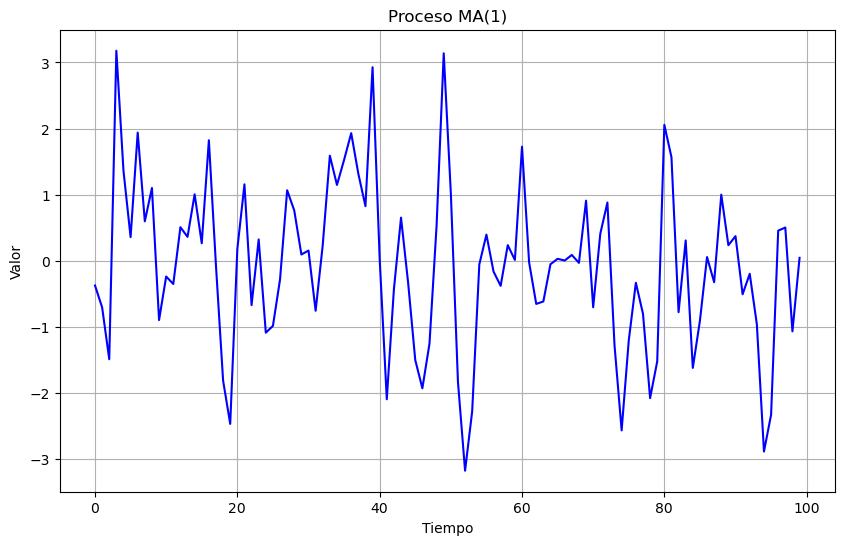

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del proceso MA(1)
theta = 0.5  # Coeficiente del término de error
mu = 0  # Media de la serie temporal
sigma = 1  # Varianza del término de error
T = 100  # Longitud de la serie temporal

# Generación de la serie temporal MA(1)
epsilon = np.random.normal(0, sigma, T)  # Términos de error aleatorio
X = np.zeros(T)
X[0] = mu + epsilon[0]  # Valor inicial de la serie

for t in range(1, T):
    X[t] = mu + epsilon[t] + theta * epsilon[t-1]

# Gráfico de la serie temporal
plt.figure(figsize=(10, 6))
plt.plot(X, color='blue')
plt.title('Proceso MA(1)')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.grid(True)
plt.show()

<h3> Modelos autoregresivos de media móvil (ARMA) </h3>

Un modelo ARMA (Autorregresivo de Media Móvil) es una combinación de un modelo autorregresivo (AR) y un modelo de media móvil (MA), que se utiliza para modelar series temporales. Este modelo combina la dependencia lineal de los valores pasados de la serie (AR) con la dependencia lineal de los términos de error pasados (MA), lo que permite capturar tanto la estructura de autocorrelación como la estructura de la media móvil en los datos. Matemáticamente, un modelo ARMA(p, q) se define como:

$$y_t = \beta_{0} + \sum_{i = 1}^{p} \beta_{i} y_{t - i} + \sum_{j = 0}^{q} \theta_{j} \varepsilon_{t - j}  $$

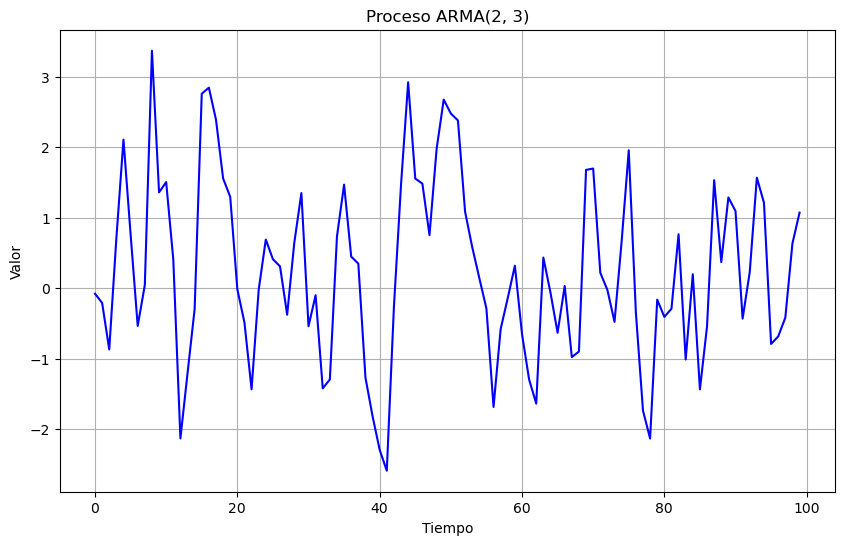

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Parámetros del proceso ARMA(p, q)
p = 2  # Orden del modelo autorregresivo (AR)
q = 3  # Orden del modelo de media móvil (MA)
phi = np.array([0.5, -0.2])  # Coeficientes del AR
theta = np.array([0.3])  # Coeficientes del MA
mu = 0  # Media del proceso
sigma = 1  # Desviación estándar del término de error
T = 100  # Longitud de la serie temporal

# Simulación del proceso ARMA(p, q)
ar = np.r_[1, -phi]  # Coeficientes del AR en el formato requerido por statsmodels
ma = np.r_[1, theta]  # Coeficientes del MA en el formato requerido por statsmodels
arma_process = sm.tsa.ArmaProcess(ar, ma)
X = arma_process.generate_sample(nsample=T)  # Generación de la serie temporal

# Gráfico de la serie temporal
plt.figure(figsize=(10, 6))
plt.plot(X, color='blue')
plt.title('Proceso ARMA({}, {})'.format(p, q))
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.grid(True)
plt.show()

<h3> Modelos autoregresivos integrados de media móvil (ARIMA) </h3>

Un modelo ARIMA(p, d, q) se compone de tres componentes:

**Componente Autorregresivo (AR)**: Este componente se denota por $AR(p)$. Representa la relación lineal entre los valores pasados de la serie temporal y el valor actual. Matemáticamente, el componente AR se define como:

$$y_t = \beta_{0} + \sum_{i = 1}^{p} \beta_{i} y_{t - i} + \varepsilon_t $$

**Componente de Integración (I)**: Este componente se denota por I(d). Representa el número de diferencias que se aplican a la serie temporal para hacerla estacionaria. La diferenciación se realiza restando cada valor de la serie actual al valor anterior. Si $d = 0 $, el modelo corresponde a un $ARMA(p, q)$

**Componente de Media Móvil (MA)**: Este componente se denota por MA(q). Representa la relación lineal entre los términos de error pasados y el valor actual. Matemáticamente, el componente MA se define como:

$$y_t = \mu + \sum_{j = 0}^{q} \theta_{j} \varepsilon_{t - j}$$

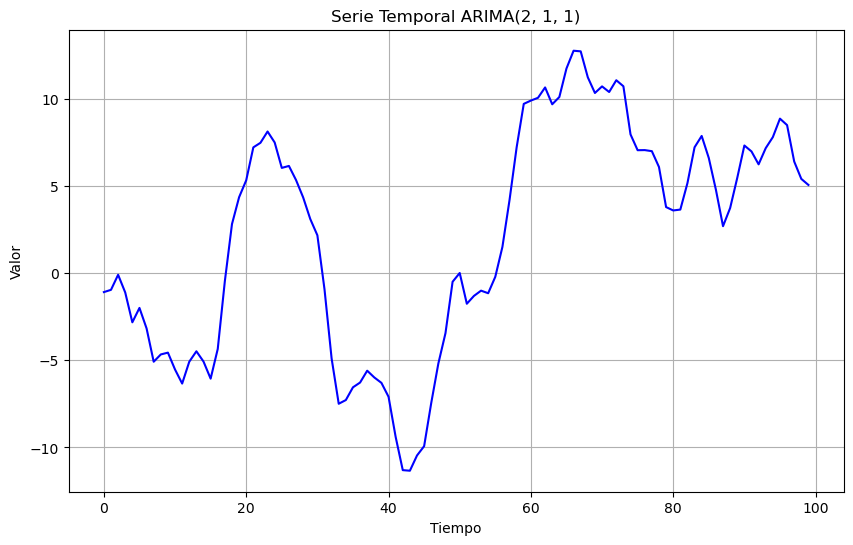

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Parámetros del proceso ARIMA(p, d, q)
p = 2  # Orden del modelo autorregresivo (AR)
d = 1  # Orden de integración
q = 1  # Orden del modelo de media móvil (MA)
phi = np.array([0.5, -0.2])  # Coeficientes del AR
theta = np.array([0.3])  # Coeficientes del MA
mu = 0  # Media del proceso
sigma = 1  # Desviación estándar del término de error
T = 100  # Longitud de la serie temporal

# Simulación de residuos de un modelo ARIMA(p, 0, q)
np.random.seed(123)
ar = np.r_[1, -phi]  # Coeficientes del AR en el formato requerido por statsmodels
ma = np.r_[1, theta]  # Coeficientes del MA en el formato requerido por statsmodels
arma_process = sm.tsa.ArmaProcess(ar, ma)
residuals = arma_process.generate_sample(nsample=T)

# Integración de los residuos para obtener la serie temporal
integrated_series = np.cumsum(residuals)

# Gráfico de la serie temporal
plt.figure(figsize=(10, 6))
plt.plot(integrated_series, color='blue')
plt.title('Serie Temporal ARIMA({}, {}, {})'.format(p, d, q))
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.grid(True)
plt.show()


<h2> Test de Dickey-Fuller </h2>

El test de Dickey-Fuller es una herramienta estadística utilizada para determinar si una serie temporal es estacionaria, es decir, si sus propiedades estadísticas, como la media y la varianza, son constantes a lo largo del tiempo. Desarrollado por David Dickey y Wayne Fuller en 1979, este test es fundamental en el análisis de series temporales y se aplica comúnmente en econometría para evaluar la presencia de raíces unitarias. La presencia de una raíz unitaria implica que la serie tiene una tendencia estocástica y no es estacionaria, lo que puede afectar la validez de modelos predictivos y la interpretación de relaciones económicas. El test de Dickey-Fuller, y su versión aumentada (ADF), proporcionan un marco riguroso para evaluar estas características y guiar el tratamiento adecuado de las series temporales en análisis más complejos.

El modelo matemático del test de Dickey-Fuller se basa en una regresión autorregresiva de la serie temporal. Supongamos que $y_{t}$ es la serie temporal que queremos analizar. El modelo de regresión para el test de Dickey-Fuller se formula como:

$$\Delta y_t = \alpha + \beta t + \gamma y_{t-1} + \delta_1 \Delta y_{t-1} + \delta_2 \Delta y_{t-2} + \cdots + \delta_p \Delta y_{t-p} + \epsilon_t$$

donde:
- $\Delta y_t = y_t - y_{t-1}$ es la primera diferencia de $y_t$.
- $\alpha$ es una constante.
- $\beta$ es el coeficiente de una tendencia temporal determinista (en algunas versiones del test, este término puede estar ausente).
- $\gamma$ es el coeficiente que se usa para testar la presencia de una raíz unitaria.
- $\delta_1, \delta_2, \ldots, \delta_p$  son los coeficientes de las diferencias retardadas de $y_t$ para capturar la estructura de autocorrelación de la serie.
- $\epsilon_t$ es el término de error.

El objetivo del test es evaluar:

$$H_{0}: \gamma = 0$$
$$H_{1}: \gamma < 0$$

Si $\gamma$ es significativamente diferente de cero y negativo, se rechaza la hipótesis nula y se concluye que la serie es estacionaria. De lo contrario, no se rechaza la hipótesis nula y se considera que la serie tiene una raíz unitaria y es no estacionaria.

<h2> Ejemplo práctico </h2>

Para este ejercicio vamos a utilizar los datos air2, que corresponden a una serie de tiempo con el número de pasajeros de una aerolínea entre 1949 y 1960, y vamos a explorar las propiedades de series de tiempo que contiene este dataset.

In [16]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from io import BytesIO

from statsmodels.tsa.arima.model import ARIMA

In [17]:
# Dataset
air2 = requests.get('https://www.stata-press.com/data/r12/air2.dta').content
data = pd.read_stata(BytesIO(air2))
data.index = data.time

data

,air,time,t
time,,,
1949.000000,112,1949.000000,1.0
1949.083374,118,1949.083374,2.0
1949.166626,132,1949.166626,3.0
1949.250000,129,1949.250000,4.0
1949.333374,121,1949.333374,5.0
...,...,...,...
1960.583374,606,1960.583374,140.0
1960.666626,508,1960.666626,141.0
1960.750000,461,1960.750000,142.0


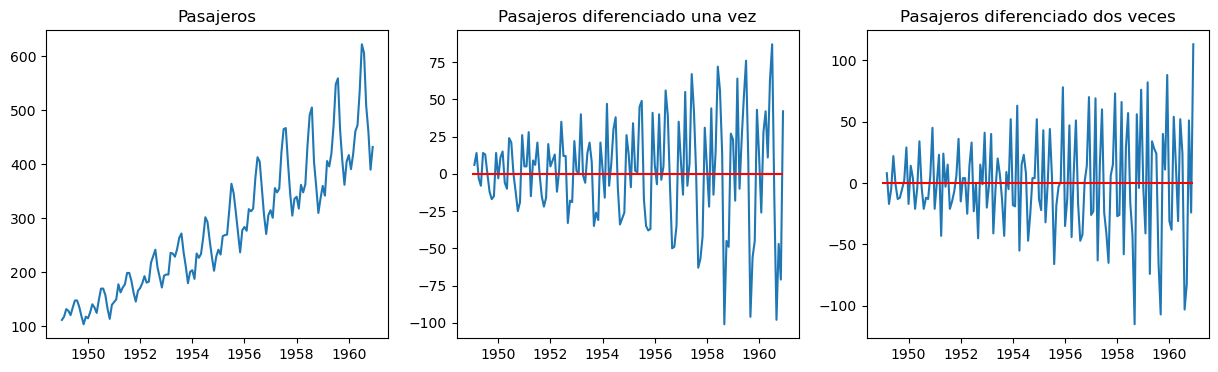

In [18]:
# Dataset
data['D.air'] = data['air'].diff()
data['D2.air'] = data['D.air'].diff()


fig, axes = plt.subplots(1, 3, figsize=(15,4))

axes[0].plot(data.index._mpl_repr(), data['air'], '-')
axes[0].set(title='Pasajeros')

axes[1].plot(data.index._mpl_repr(), data['D.air'], '-')
axes[1].hlines(0, data.index[0], data.index[-1], 'r')
axes[1].set(title='Pasajeros diferenciado una vez');

axes[2].plot(data.index._mpl_repr(), data['D2.air'], '-')
axes[2].hlines(0, data.index[0], data.index[-1], 'r')
axes[2].set(title='Pasajeros diferenciado dos veces');


In [19]:
from pmdarima.arima import auto_arima

In [20]:
arima_order = auto_arima(data['air'])

In [21]:
arima_order

ARIMA(order=(4, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [22]:
data.set_index('t', inplace=True)

train_size = int(len(data)*0.8)

train_df = data.loc[:train_size, 'air']
test_df = data.loc[train_size:, 'air']

In [23]:
arima_model = ARIMA(train_df, order=arima_order.order)

/Users/juanfelipe/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/juanfelipe/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/juanfelipe/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [24]:
trained_model = arima_model.fit()

/Users/juanfelipe/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [25]:
print(trained_model.summary())

                               SARIMAX Results                                
Dep. Variable:                    air   No. Observations:                  115
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -507.430
Date:                Fri, 17 May 2024   AIC                           1030.860
Time:                        16:54:21   BIC                           1052.750
Sample:                             0   HQIC                          1039.744
                                - 115                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9569      0.119      8.015      0.000       0.723       1.191
ar.L2          0.2881      0.148      1.946      0.052      -0.002       0.578
ar.L3         -0.6607      0.122     -5.396      0.0

In [26]:
predict = trained_model.get_prediction(start=train_size, end=len(data))
predict_ci = predict.conf_int()

/Users/juanfelipe/miniforge3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


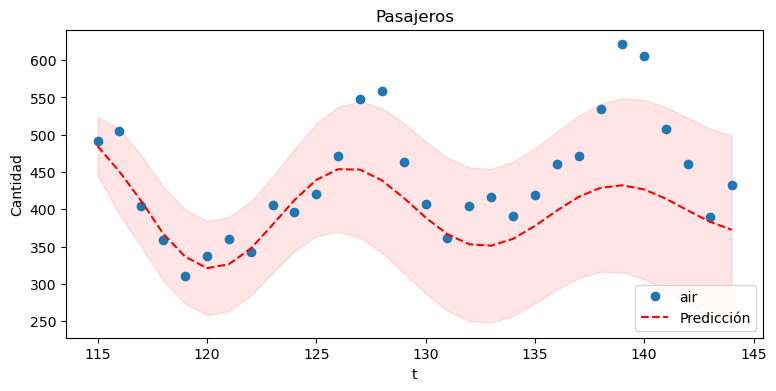

In [27]:
# Graph
test_df = pd.DataFrame(test_df)

fig, ax = plt.subplots(figsize=(9,4))
npre = 4
ax.set(title='Pasajeros', ylabel='Cantidad')

# Plot data points
test_df.plot(ax=ax, style='o', label='Observado')

# Plot predictions
predict.predicted_mean.plot(ax=ax, style='r--', label='Predicción')
ci = predict_ci
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)

legend = ax.legend(loc='lower right')